In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram

In [ ]:
wine = pd.read_csv("wine.csv")
print(wine.describe())
wine.head()

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Perform Standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(wine)

In [ ]:
# Perform PCA
pca = PCA(n_components=13)
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components)

([<matplotlib.axis.XTick at 0x7db21eea1cf0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13')])

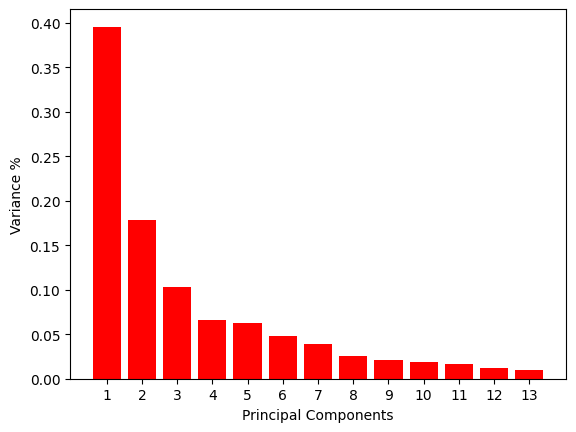

In [ ]:
pr_co = range(1, pca.n_components_+1)
plt.bar(pr_co, pca.explained_variance_ratio_, color='red')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(pr_co)

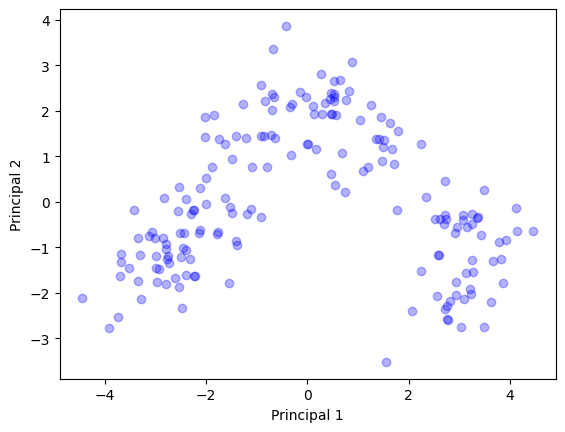

In [ ]:
plt.scatter(principal_df[0], principal_df[1], alpha=.3, color='blue')
plt.xlabel('Principal 1')
plt.ylabel('Principal 2')
plt.show()

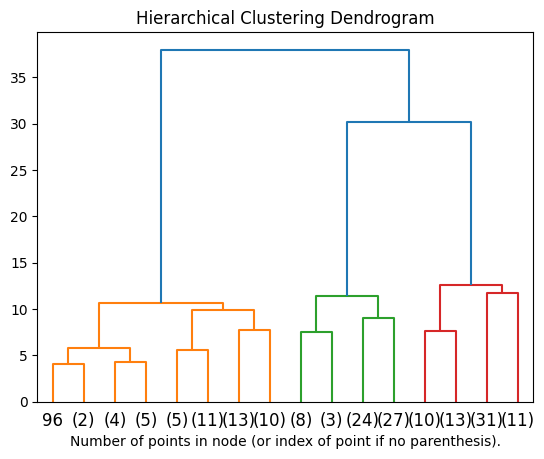

In [ ]:
# Hierarchical Clustering
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title('Hierarchical Clustering Dendrogram')
# Perform hierarchical clustering
hierarchical_cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hierarchical_cluster.fit(principal_df)
plot_dendrogram(hierarchical_cluster, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
# K-Means Clustering
# Elbow method to find optimal number of clusters
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(principal_df)
    distortions.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

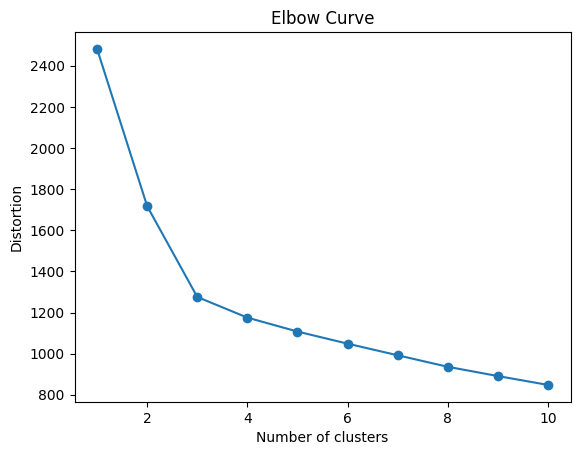

In [ ]:
# Plotting the elbow curve
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#The scree plot levels off at k=3 and let's use it to determine the clusters

In [ ]:
# Based on the elbow curve, select the optimal number of clusters for K-Means
optimal_k = 3  # Assuming from elbow curve observation

In [ ]:
# Perform K-Means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(principal_df)
labels_kmeans = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Check if the clustering results match the original class labels
# Assuming original class labels are stored in a variable named 'original_labels'
# Compare the clustering results with original labels
match_count = np.sum(labels_kmeans == pca)

In [ ]:
# If match_count == number of data points, clustering results match the original labels
if match_count == len(wine):
    print("Clustering results match the original labels.")
else:
    print("Clustering results do not match the original labels.")

Clustering results do not match the original labels.


#Conclusion

Using PCA we reduced the variables to only 2 from 13 and use clustering classification, we can safely assume that there exists 3 cluster in the wine data sets